<a href="https://colab.research.google.com/github/ramaditoferdian/Algoritma-Genetika-Maksimum/blob/main/New_TuPro_1_Kelompok_Irwan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEKLARASI LIBRARY

In [ ]:
import random  #menimport library random pada python 
import math   #mengimport library math pada python 
import matplotlib.pyplot as plt   #mengimport matplotlib yang ada pada python

In [ ]:
# set seed agar tiap running hasilnya sama
seed = 1301194018  #menggunakan NIM dari anggota kelompok kami
random.seed(seed)

GENERATE POPULASI

adalah fungsi yang membuat kromosom sepanjang len_kromoson dan populasi sebanyak n dengan representasi biner

In [ ]:
def generate_populasi(len_kromosom, n):
  populasi = [] #define populasi 

  #looping sebanyak n populasi 
  for i in range(n):
    kromosom = [] #define kromosom
    #looping sebanyang panjang dari kromosom 
    for j in range(len_kromosom):
      kromosom.append(random.randint(0,1))#merandom nilai antara 1 dan 0 yang akan digunakan untuk mengisi kromosom 

    populasi.append(kromosom) #populasi diisi dengan kromosom yang sudah berisi nilai biner random 1 dan 0 

  return populasi #mengembalikan populasi yang sudah berisikan n kromosom 


DEKODE KEOMOSOM

adalah proses pendekosean kromosom mejadi 2 bagian x dan y


In [ ]:
def hitung_xy(kromosom,xr, yr):
  #potong kromosom menjadi 2 bagian untuk x dan y
  half_kromosom = len(kromosom)//2

  #rumus 

  # menghitung bagian atas untuk x
  atas_x = 0
  kromosom_x = kromosom[:half_kromosom]
  for i in range(1, half_kromosom + 1):
    atas_x += kromosom_x[i - 1] * (2 ** -i)

  # menghitung bagian atas untuk y
  atas_y = 0
  kromosom_y = kromosom[half_kromosom:]
  for i in range(1, half_kromosom + 1):
    atas_y += kromosom_y[i - 1] * (2 ** -i)

  
  # menghitung bagian bawah untuk x dan y
  bawah = sum([2 ** -(i) for i in range (1, half_kromosom + 1)])

  # memasukkan bagian atas dan bawah dari rumus kedalam RUMUS untuk mencari x dan y
  x = xr["min"] + (atas_x * (xr["max"] - xr["min"]) / bawah)
  y = yr["min"] + (atas_y * (yr["max"] - yr["min"]) / bawah)


  return x,y

Fungsi mencari nilai fitness terbaik

In [ ]:
def fitness(x, y):

  # mengembalikkan nilai dari fungsi
  return f(x, y)

Menseleksi 2 buah kromosom dan menjadikannya sebagai parent

In [ ]:
def select_2parent(population, fitness_population):
  
  # Menggunakan Roulette Wheel Selection

  temp = 0

  for krom in range(len(population)):
    temp += fitness_population[krom]

  rng = random.random()

  krom = 0
  while rng > 0 :
    rng -= fitness_population[krom] / temp
    krom += 1
  
  return krom - 1


In [ ]:
def parent_selection(population):

  n = len(population)


  fitness_population = []
  for krom in range(n):
    x, y = hitung_xy(population[krom], xr, yr)
    fitness_population.append(fitness(x, y))



  # Normalisasi fitness value
  min_ = min(fitness_population)
  max_ = max(fitness_population)

  for i in range(n):
    fitness_population[i] = (fitness_population[i] - min_) / (max_ - min_)

  
  # Menghitung total dari semua Fitness Population
  total_fitness = sum(fitness_population)


  # Melakukan Roulette Wheel untuk mendapatkan 2 parent

  parent = []

  while len(parent) != 2:
    krom = select_2parent(population, fitness_population)
    parent.append(population[krom])

  return parent




In [ ]:
def crossover1point(parent):
  
  len_krom = len(parent[0])

  titik_potong = random.randint(0, len_krom)


  child = [0, 0]
  child[0] = parent[0][:titik_potong] + parent[1][titik_potong:]
  child[1] = parent[1][:titik_potong] + parent[0][titik_potong:]

  return child


In [ ]:
def mutasi_krom(child, prob):

  len_krom = len(anak[0])

  for i in range(2):
    for j in range(len_krom):
      if random.random() <= prob:
        child[i][j] = [0, 1][not child[i][j]]

  return child




In [ ]:
#fungsi
def f(x, y):
  return ((math.cos(x**2) * math.sin(y**2)) + (x+y))

# x, y max dan min
xr = {"min" : -1, "max" : 2} # ini untuk interval sesuai SOAL
yr = {"min" : -1, "max" : 1}

In [ ]:
# parameter
prob_crossover  = 0.6
prob_mutasi     = 0.05
n_pop           = 50
len_krom        = 10
n_elitisme      = 4

In [ ]:
generation = 50
generasi_terbaik = []
populasi = generate_populasi(len_krom, n_pop)

print(f"Prob. Crossover   : {prob_crossover}")
print(f"Prob. Mutasi      : {prob_mutasi}")
print(f"Banyak Populasi   : {n_pop}")
print(f"Panjang Kromosom  : {len_krom}")
print(f"Banyak Elitisme   : {n_elitisme}")
print(f"Banyak Generasi   : {generation}")

print()

for i in range(generation):

  fitness_populasi = []
  for kromosom in populasi:
    x,y = hitung_xy(kromosom, xr, yr)
    fitness_populasi.append(fitness(x, y))


  generasi_terbaik.append(max(fitness_populasi))


  sorted_populasi = [m for _, m in sorted(zip(fitness_populasi, populasi), reverse=True)]


  populasi_baru = sorted_populasi[:n_elitisme]


  if (i + 1) % 5 == 0:
    print(f"Generasi ke-{i + 1}, Best : {generasi_terbaik[i]}")


  while len(populasi_baru) != n_pop:

    orang_tua = parent_selection(populasi)

    if random.random() < prob_crossover:
      anak = mutasi_krom(crossover1point(orang_tua), prob_mutasi)
    else:
      anak = orang_tua + []

    populasi_baru = populasi_baru + anak

  populasi = populasi_baru + []



Prob. Crossover   : 0.6
Prob. Mutasi      : 0.05
Banyak Populasi   : 50
Panjang Kromosom  : 10
Banyak Elitisme   : 4
Banyak Generasi   : 50

Generasi ke-5, Best : 2.421329580953847
Generasi ke-10, Best : 2.4591041004131284
Generasi ke-15, Best : 2.4804368980667126
Generasi ke-20, Best : 2.4804368980667126
Generasi ke-25, Best : 2.4804368980667126
Generasi ke-30, Best : 2.4804368980667126
Generasi ke-35, Best : 2.4804368980667126
Generasi ke-40, Best : 2.4804368980667126
Generasi ke-45, Best : 2.4804368980667126
Generasi ke-50, Best : 2.4804368980667126


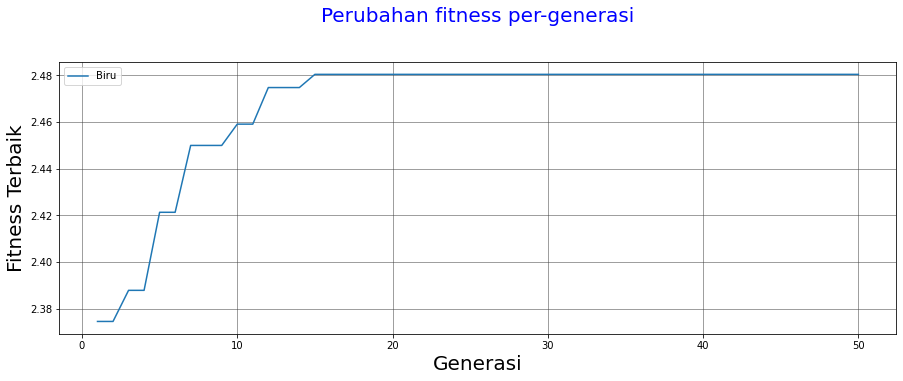

In [ ]:
# lihat pertumbuhan fitness terbaik
plt.figure(figsize=(15, 5))

plt.plot(range(1, generation + 1), generasi_terbaik)
plt.title("Perubahan fitness per-generasi", loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel("Generasi", fontsize = 20)
plt.ylabel("Fitness Terbaik", fontsize=20)
plt.grid(linestyle="-", linewidth=0.5, color='.25')
plt.legend(['Biru'], loc='upper left')
plt.show()
plt.show()